In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataframe_.csv')

In [3]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [5]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [6]:
df.columns

Index(['input', 'output'], dtype='object')

In [7]:
df.dropna(inplace = True)

In [8]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [9]:
df['input'].median()

10.195194444999998

In [10]:
df['output'].median()

-50.47098063

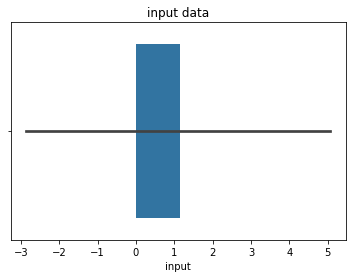

In [11]:
sns.barplot(x='input',data=df)
plt.title('input data')
plt.show()


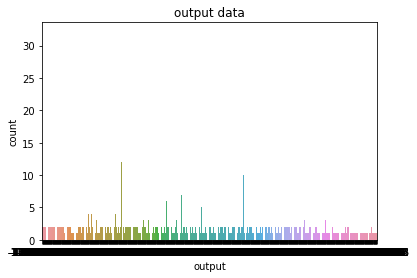

In [12]:
sns.countplot(x='output',data=df)
plt.title('output data')
plt.show()

C:\Users\JHANSI LAKSHMI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='input'>

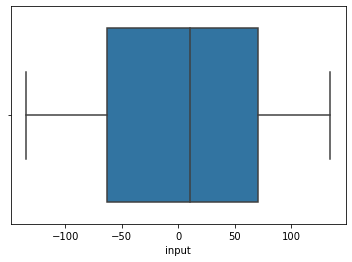

In [13]:
q1 = df['input'].quantile(0.25)
q2 = df['input'].quantile(0.50)
q3 = df['input'].quantile(0.75)
IQR1 = q3 - q1
otn = q1 - (1.5)*IQR1
otp = q3 + (1.5)*IQR1
ot = df['input'][(df['input'] < otn) | (df['input'] > otp)]
a = ot.index.tolist()
df.drop(a, inplace = True)
sns.boxplot(df['input'])

C:\Users\JHANSI LAKSHMI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

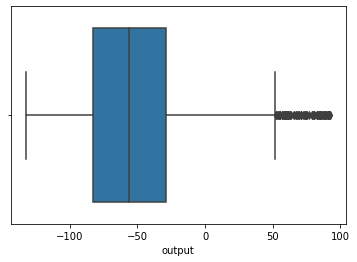

In [14]:
q1 = df['output'].quantile(0.25)
q2 = df['output'].quantile(0.50)
q3 = df['output'].quantile(0.75)
IQR1 = q3 - q1
otn = q1 - (1.5)*IQR1
otp = q3 + (1.5)*IQR1
ot = df['output'][(df['output'] < otn) | (df['output'] > otp)]
a = ot.index.tolist()
df.drop(a, inplace = True)
sns.boxplot(df['output'])

In [15]:
df.shape

(1552, 2)

In [16]:
# Identifying the inputs (X) and output (y)

y = df['output']

X = df[['input']]

In [17]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1241, 1) (1241,)
(311, 1) (311,)


In [18]:
X_train.head()

,input
295,78.322987
575,57.633331
714,-38.354004
1432,85.241190
744,-38.257448


# Scaling the numerical features

In [19]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,input
295,78.322987
575,57.633331
714,-38.354004
1432,85.241190
744,-38.257448


In [20]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled= pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,input
295,1.107091
575,0.829421
714,-0.458800
1432,1.199939
744,-0.457505


# preparing the test data

In [21]:
X_test.head()

,input
152,-58.914585
1488,71.160987
547,74.633331
443,117.596660
1315,-12.307174


In [22]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 152 to 1568
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   311 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [23]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,input
152,-58.914585
1488,71.160987
547,74.633331
443,117.596660
1315,-12.307174


In [24]:
X_test_num_rescaled= pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,input
152,-0.734739
1488,1.010972
547,1.057574
443,1.634173
1315,-0.109233


# Model Building

# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_num_rescaled, y_train)

LinearRegression()

In [26]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [27]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
152,-53.714949,-69.888250
1488,-23.660876,-18.642054
547,-21.000000,-17.274046
443,73.942257,-0.347678
1315,-67.306256,-51.526213


<AxesSubplot:xlabel='output', ylabel='Count'>

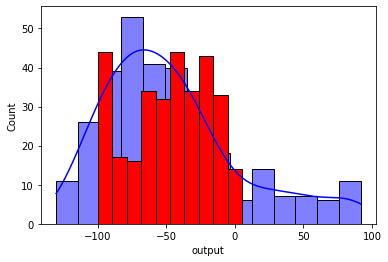

In [28]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', alpha=True)

# Evaluation metrics

In [31]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Mean Absolute Error:  33.19182227188994
Mean Squared Error:  1631.5357196301745
Root Mean Squared Error:  40.39227301886061


# KNN Regression

In [32]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_num_rescaled, y_train)

KNeighborsRegressor()

In [33]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [34]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
152,-53.714949,-42.324263
1488,-23.660876,-5.646167
547,-21.000000,3.664244
443,73.942257,66.223005
1315,-67.306256,-64.010250


<AxesSubplot:xlabel='output', ylabel='Count'>

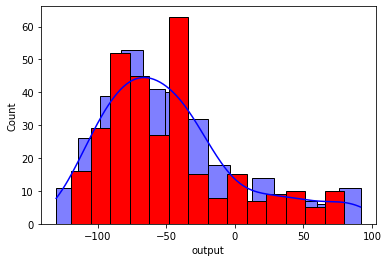

In [35]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', alpha=True)

In [36]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Mean Absolute Error:  15.209884665027653
Mean Squared Error:  396.76379114828944
Root Mean Squared Error:  19.918930471997975


# Decision Tree Regression

In [37]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_num_rescaled, y_train)

DecisionTreeRegressor()

In [38]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [39]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
152,-53.714949,-42.242901
1488,-23.660876,-23.660876
547,-21.000000,-20.000000
443,73.942257,79.206626
1315,-67.306256,-52.843621


<AxesSubplot:xlabel='output', ylabel='Count'>

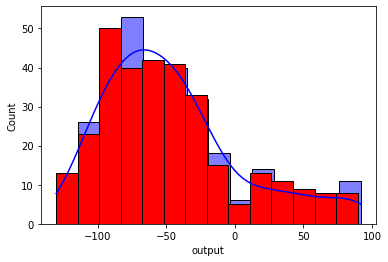

In [40]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', alpha=True)

In [41]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Mean Absolute Error:  8.993783487531923
Mean Squared Error:  329.5857338653751
Root Mean Squared Error:  18.154496243778706


# Random forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_num_rescaled, y_train)

RandomForestRegressor()

In [43]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [44]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
152,-53.714949,-40.902340
1488,-23.660876,-12.247470
547,-21.000000,-11.603165
443,73.942257,78.937499
1315,-67.306256,-55.086919


<AxesSubplot:xlabel='output', ylabel='Count'>

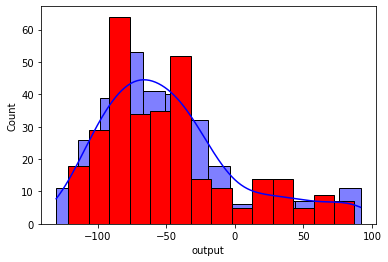

In [45]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', alpha=True)

In [46]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Mean Absolute Error:  11.611959795094899
Mean Squared Error:  297.1832076472197
Root Mean Squared Error:  17.239002513116


# Gradient boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_num_rescaled, y_train)

GradientBoostingRegressor()

In [49]:
y_test_pred = regressor.predict(X_test_num_rescaled)

In [50]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
152,-53.714949,-40.326541
1488,-23.660876,-13.184493
547,-21.000000,-4.426781
443,73.942257,68.175331
1315,-67.306256,-70.248912


<AxesSubplot:xlabel='output', ylabel='Count'>

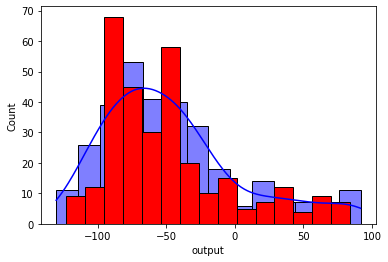

In [51]:
sns.histplot(y_test, color='blue', kde=True)
sns.histplot(y_test_pred, color='red', alpha=True)

In [52]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Mean Absolute Error:  14.239555004648563
Mean Squared Error:  349.0397836375493
Root Mean Squared Error:  18.68260644657349


# conclusion

In [57]:
a = {'Model' : ['Logistic Regression','KNN Regression','Decision Tree ','Random Forest ','Gradient Boosting '],
    'mean_absolute_error' : [33.19182227188994,15.209884665027653,8.993783487531923,11.611959795094899,14.239555004648563]}


In [58]:
a

{'Model': ['Logistic Regression',
  'KNN Regression',
  'Decision Tree ',
  'Random Forest ',
  'Gradient Boosting '],
 'mean_absolute_error': [33.19182227188994,
  15.209884665027653,
  8.993783487531923,
  11.611959795094899,
  14.239555004648563]}

In [59]:
df1 = pd.DataFrame(a)

In [60]:
df1

,Model,mean_absolute_error
0,Logistic Regression,33.191822
1,KNN Regression,15.209885
2,Decision Tree,8.993783
3,Random Forest,11.611960
4,Gradient Boosting,14.239555


<AxesSubplot:xlabel='mean_absolute_error', ylabel='Model'>

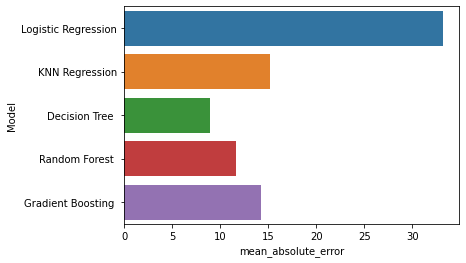

In [62]:
sns.barplot(y = df1.Model,x = df1.mean_absolute_error)

# decision tree regression is the best algorithm